# **Capstone Project**

## Introduction
The Purpose of this notebook is to provide 3 business recomendations backed by data analysis.
Each of our suggestions will have code associated with them. 

This code will demonstrate:
* How we accessed the data.
* How we cleaned the data.
* How we filtered the data. 
* How we visualized the data.

These steps allowed us to confidently arrive at 3 strong business reccomendations for our client, **Computing Vision**

## Importing Required Libraries and Using Sqlite3 to Connect to the Database

Before we can analyze our chosen data bases, we must first import the libraries that will enable us to do so.


In [21]:
#intsalling necessary Libraries 
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats 
%matplotlib inline


## Asking our first question

Our first question is: "Is there a certain month in which movies tend to perform the best financially?"

To answer this question we need to:
* Load in the CSV file that contains the information we need.
* Filter the data to see which movies came out in which month.
* Provide an additional filter that will return the gross revenue of any movie in a given month
* Add up the total gross revenues of all the movies that came out in a given month.
* Find the 10 year average of the monthly gross revenue
* Create visualizations that exhibit the findings.



In [22]:
#we load the csv and save it in a Dataframe

budgets = pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz')
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [23]:
budgets.info()

#we can see that there are 0 not null data, but in the cell above we can see 0 values
#We also see the datatypes for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [24]:
#we change the dtype of the date to a datetime so we can split the year and month of each movie

budgets["release_date"] = pd.to_datetime(budgets["release_date"])

In [25]:
#we create a column named month and year so we can save that in the dataframe
budgets['month'] = budgets["release_date"].dt.month_name()

budgets['year'] = budgets["release_date"].dt.year
budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",December,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May,2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June,2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,December,2018
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",April,1999
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",July,2005
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,September,2015


In [26]:
#we clean the worlwide gross and production budget columns so we can sum the values

budgets['worldwide_gross'] = budgets.worldwide_gross.apply(lambda x:x.replace('$','').replace(',',''))
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(float)

budgets['production_budget'] = budgets.production_budget.apply(lambda x:x.replace('$','').replace(',',''))
budgets['production_budget'] = budgets['production_budget'].astype(float)

In [27]:
budgets #this will return budgets after it has been cleaned

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,1,2009-12-18,Avatar,425000000.0,"$760,507,625",2.776345e+09,December,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,May,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,June,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,December,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,$0,0.000000e+00,December,2018
5778,79,1999-04-02,Following,6000.0,"$48,482",2.404950e+05,April,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,"$1,338",1.338000e+03,July,2005
5780,81,2015-09-29,A Plague So Pleasant,1400.0,$0,0.000000e+00,September,2015


In [28]:
#we add a season column so we can also filter the data by season if its neccesary

season_dict = {'January': 'Winter',
               'February': 'Winter',
               'March': 'Spring', 
               'April': 'Spring',
               'May': 'Spring',
               'June': 'Summer',
               'July': 'Summer',
               'August': 'Summer',
               'September': 'Fall',
               'October': 'Fall',
               'November': 'Fall',
               'December': 'Winter'}
budgets['Season'] = budgets['month'].apply(lambda x: season_dict[x])

In [29]:
# we filter the data to get relevant information
recent_movies =  budgets.query("year >= 2012").iloc[:1400]
recent_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,Season
2,3,2019-06-07,Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,June,2019,Summer
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,May,2015,Spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,December,2017,Winter
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,"$936,662,225",2.053311e+09,December,2015,Winter
6,7,2018-04-27,Avengers: Infinity War,300000000.0,"$678,815,482",2.048134e+09,April,2018,Spring
...,...,...,...,...,...,...,...,...,...
5044,45,2015-12-18,Saul fia,1700000.0,"$1,777,043",9.696537e+06,December,2015,Winter
5047,48,2019-02-01,Braid,1660000.0,$0,8.074500e+04,February,2019,Winter
5059,60,2014-09-26,Two Night Stand,1600000.0,"$15,600",8.680810e+05,September,2014,Fall
5063,64,2016-10-21,Moonlight,1500000.0,"$27,854,931",6.524551e+07,October,2016,Fall


In [30]:
#This cell get the sum of all the gross grouped by month

sum_gross = recent_movies.groupby('month')[['worldwide_gross']].sum().sort_values(by='worldwide_gross', ascending=False)
sum_gross.index.name = "month"
sum_gross.reset_index(inplace=True)
sum_gross

,month,worldwide_gross
0,November,2.462244e+10
1,June,2.292101e+10
2,December,2.290977e+10
3,May,2.257021e+10
4,July,2.146751e+10
5,March,1.774840e+10
6,February,1.358781e+10
7,April,1.251088e+10
8,August,1.040229e+10
9,October,1.030930e+10


In [31]:
#we grouped the data by moth so we can have the worldwide gross per month

avrg_gross = recent_movies.groupby('month')[['worldwide_gross']].mean().sort_values(by='worldwide_gross', ascending=False)
avrg_gross.index.name = "month"
avrg_gross.reset_index(inplace=True)
avrg_gross

,month,worldwide_gross
0,May,2.257021e+08
1,July,2.213145e+08
2,June,2.122316e+08
3,November,1.938774e+08
4,December,1.414183e+08
5,March,1.344576e+08
6,February,1.235255e+08
7,April,1.214648e+08
8,August,9.543388e+07
9,October,8.054144e+07


Text(0, 0.5, 'Average Gross Revenue (in 100 Millions)')

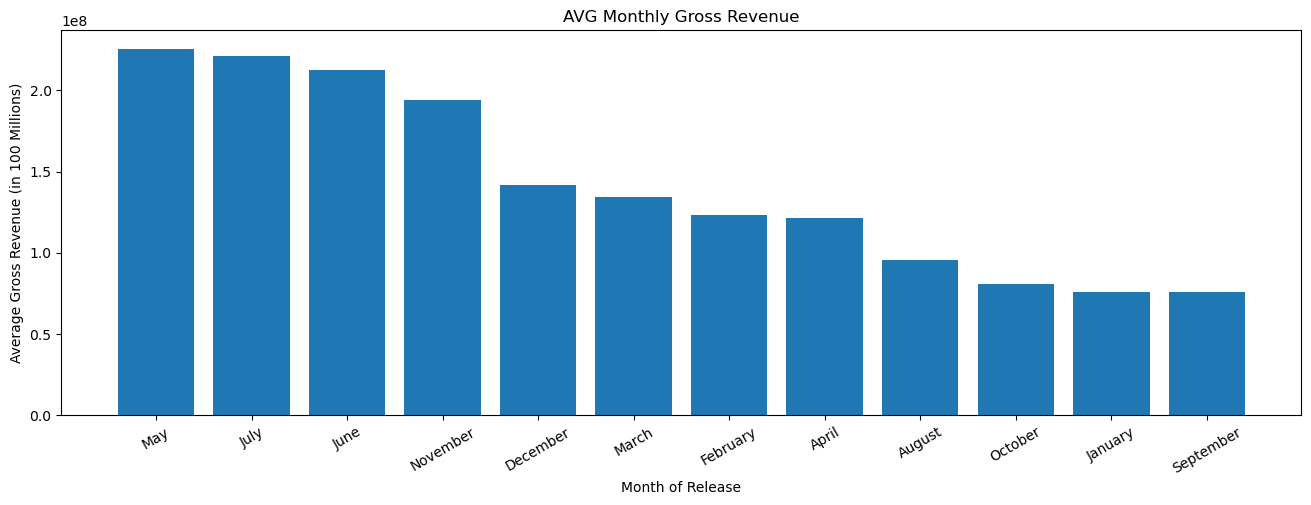

In [32]:
#Plot for the avg montly gross worldwide

fig = plt.subplots( figsize=(16, 5))

months = avrg_gross['month']
gross_profit = avrg_gross['worldwide_gross']
# Plot data
plt.bar(months, gross_profit)

# Customize appearance
plt.tick_params(axis="x", labelrotation=30)
plt.title('AVG Monthly Gross Revenue')
plt.xlabel('Month of Release')
plt.ylabel("Average Gross Revenue (in 100 Millions)")

In [33]:
#We create a df to make an analysis by season
seasons_gross = recent_movies.groupby('Season')[['worldwide_gross']].mean().sort_values(by='worldwide_gross', ascending=False)
seasons_gross.index.name = "Season"
seasons_gross.reset_index(inplace=True)
seasons_gross

,Season,worldwide_gross
0,Summer,1.744930e+08
1,Spring,1.577000e+08
2,Winter,1.180445e+08
3,Fall,1.173838e+08


Text(0, 0.5, 'Average Gross Revenue (in Millions)')

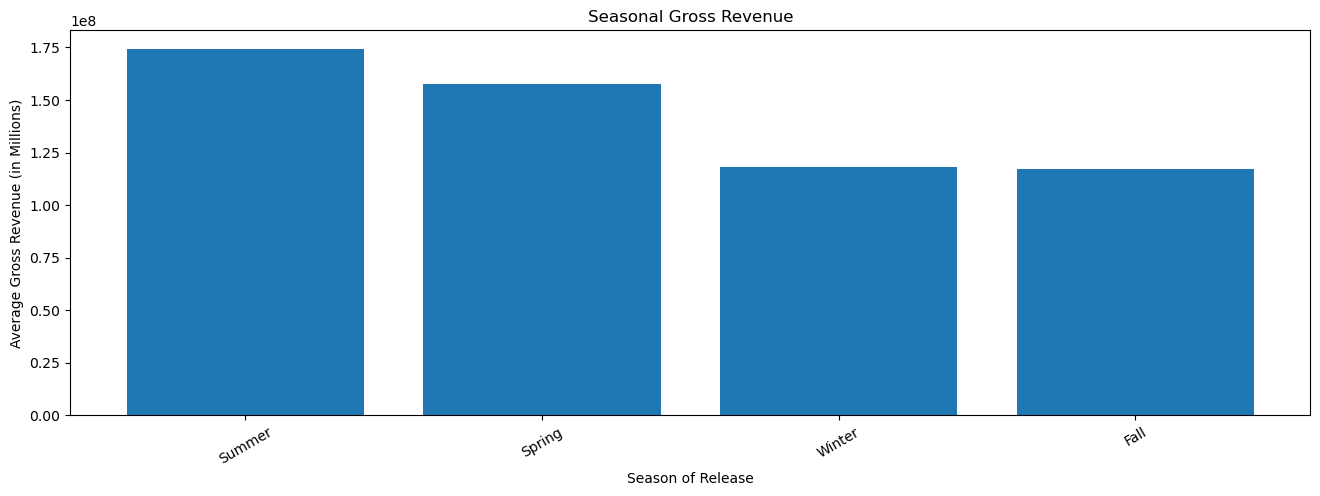

In [34]:
#we create a bar plot to see the seasonal gross revenue

fig = plt.subplots( figsize=(16, 5))

season = seasons_gross['Season']
gross = seasons_gross['worldwide_gross']
# Plot data
plt.bar(season, gross)

# Customize appearance
plt.tick_params(axis="x", labelrotation=30)
plt.title('Seasonal Gross Revenue')
plt.xlabel('Season of Release')
plt.ylabel("Average Gross Revenue (in Millions)")

## Asking our second question

Our first question is: "Which genre of movies tend to get the best ratings"

To answer this question we need to:
* Connect to the database using SQLite3
* Create a table that shows the name of the movie as well as the rating it got
* Organize all of the movies by their genre
* Create a conditional that filters out movies with less than 3500 votes
* Complile this information to create a table of Genres and the avg rating of that genre
* Create a visualization that demonstrates our findings




In [35]:
conn = sqlite3.connect('zippedData/im/im.db')

In [36]:
q = '''SELECT *
    FROM movie_basics AS mb
    JOIN movie_ratings as mr
        USING ('movie_id')
    
   ;'''

movie_basics_ratings = pd.read_sql(q,conn)
movie_basics_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [37]:
movie_basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [38]:
movie_basics_ratings.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [39]:
movie_basics_ratings.dropna(subset=['genres'], inplace=True)
movie_basics_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [40]:
movie_basics_ratings['numvotes'].mean()

3562.1726304550184

In [41]:
condition_on_numvotes = movie_basics_ratings['numvotes'] > 3500
movie_basics_ratings = movie_basics_ratings[condition_on_numvotes]

condition_on_startyear = movie_basics_ratings['start_year'] >= 2012
movie_basics_ratings = movie_basics_ratings[condition_on_startyear]

movie_basics_ratings.reset_index(inplace=True)
movie_basics_ratings

,index,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
1,16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248
2,31,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378
3,41,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886
4,47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300
...,...,...,...,...,...,...,...,...,...
3765,73133,tt9364684,Borç Harç,Borç Harç,2019,90.0,Comedy,1.4,3511
3766,73206,tt9412098,Fyre,Fyre,2019,97.0,"Documentary,Music",7.3,25387
3767,73304,tt9495224,Black Mirror: Bandersnatch,Black Mirror: Bandersnatch,2018,90.0,"Drama,Mystery,Sci-Fi",7.3,91349
3768,73374,tt9558612,PM Narendra Modi,PM Narendra Modi,2019,136.0,"Biography,Drama",3.7,4057


In [42]:
genres_rating = movie_basics_ratings[['genres','averagerating']]
genres_rating

,genres,averagerating
0,Drama,6.9
1,"Action,Animation,Comedy",1.9
2,"Action,Crime,Drama",7.1
3,"Adventure,Drama,Romance",6.1
4,"Adventure,Comedy,Drama",7.3
...,...,...
3765,Comedy,1.4
3766,"Documentary,Music",7.3
3767,"Drama,Mystery,Sci-Fi",7.3
3768,"Biography,Drama",3.7


In [43]:
def split(string):
    return string.split(',')

genres_rating['genres'] = genres_rating['genres'].apply(split)
genres_rating

C:\Users\Culle\AppData\Local\Temp\ipykernel_4340\1635291708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_rating['genres'] = genres_rating['genres'].apply(split)


,genres,averagerating
0,[Drama],6.9
1,"[Action, Animation, Comedy]",1.9
2,"[Action, Crime, Drama]",7.1
3,"[Adventure, Drama, Romance]",6.1
4,"[Adventure, Comedy, Drama]",7.3
...,...,...
3765,[Comedy],1.4
3766,"[Documentary, Music]",7.3
3767,"[Drama, Mystery, Sci-Fi]",7.3
3768,"[Biography, Drama]",3.7


In [44]:
 def split_genres(df):
    new_df = pd.DataFrame({},columns=['genres','averagerating'])
    for indx in df.index:
        new = pd.DataFrame({'genres':df.iloc[indx,0],'averagerating':df.iloc[indx,1]})
        new_df = pd.concat([new_df,new],ignore_index=True)
           
    
    return new_df
        

In [45]:
genres_rating = split_genres(genres_rating)

In [46]:
genre_rate = genres_rating.groupby('genres')[['averagerating']].mean().sort_values('averagerating',ascending=False)
genre_rate

,averagerating
genres,
News,7.820000
Documentary,7.348108
Biography,6.995251
War,6.991045
History,6.988957
Sport,6.904687
Animation,6.792442
Music,6.782883
Drama,6.621093


In [47]:
movie_basics_ratings[movie_basics_ratings['genres'].str.contains('News')][['runtime_minutes']]

,runtime_minutes
1052,79.0
2108,92.0
2172,73.0
2340,87.0
3356,96.0


In [48]:
genre_rate.drop('News',axis=0,inplace=True)

In [49]:
genre_rate

,averagerating
genres,
Documentary,7.348108
Biography,6.995251
War,6.991045
History,6.988957
Sport,6.904687
Animation,6.792442
Music,6.782883
Drama,6.621093
Musical,6.571429


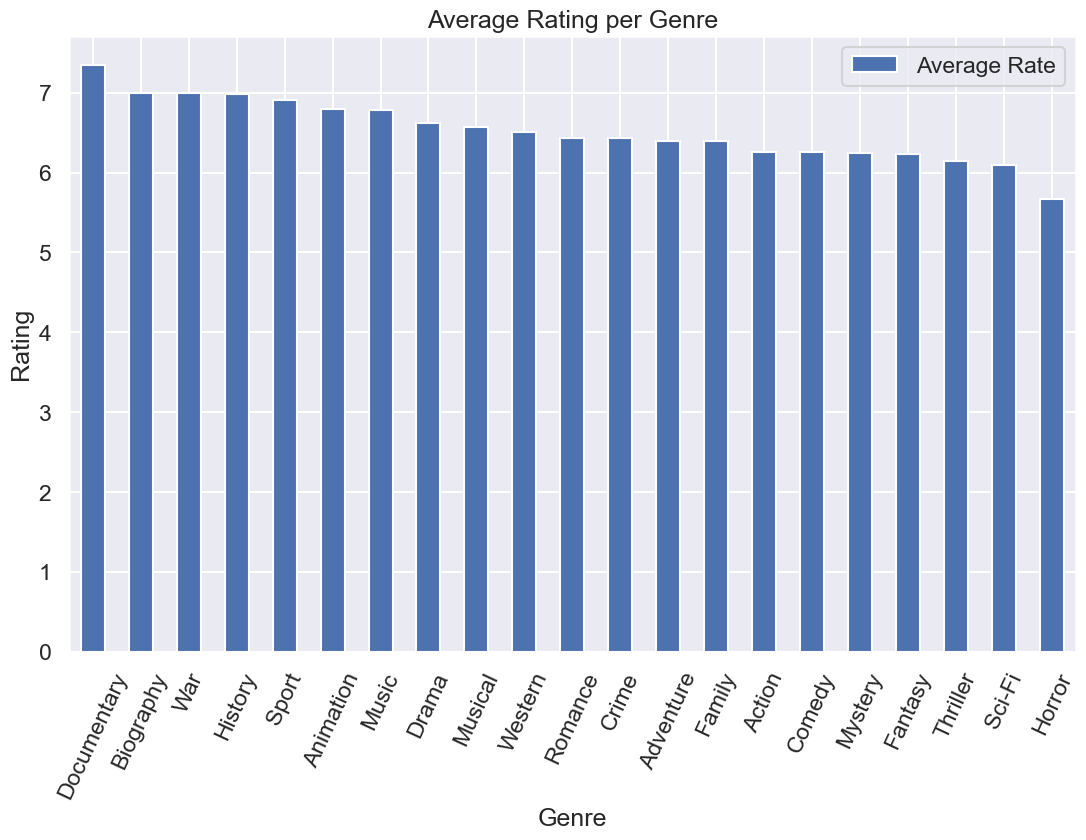

In [50]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_theme()
sns.set_context("talk")
fig,ax =plt.subplots(figsize=(13,8))
genre_rate.plot(kind='bar',ax=ax,rot=65)
ax.set_ylabel('Rating')
ax.set_xlabel('Genre')
plt.title('Average Rating per Genre')
ax.legend(['Average Rate']);

In [51]:
q = '''SELECT *
    FROM movie_basics AS mb
    JOIN movie_ratings as mr
        USING ('movie_id')
    WHERE numvotes > 3500 AND start_year >= 2012
    
;'''

df = pd.read_sql(q,conn)
df1=df.groupby('genres')[['averagerating']].mean().sort_values('averagerating',ascending=False)
df1['count'] = df.groupby('genres')[['averagerating']].count()
df1

,averagerating,count
genres,,
Biography,8.6,1
"Drama,Romance,Sport",8.5,1
"Animation,History",8.3,1
"Biography,Documentary,Drama",8.2,2
"Comedy,Drama,Thriller",8.2,2
...,...,...
"Action,Adventure,History",4.5,1
"Crime,Family,Horror",4.5,1
"Crime,Romance,Thriller",4.3,1


## Asking our third question

Our third question is: "What is the most ideal runtime for a movie?"

To answer this question we can use most of the information that we gathered for step 2.
Additionally we will need:
* Create a table showing runtime statistics (mean, median, mode, etc.)
* Develop a Null and Alternative hypothesis to test against.
* Determine what type of test that we need to run.
* Decide the outcome of the test based on the data gathered.



In [53]:
movie_basics_ratings

,index,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
1,16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248
2,31,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378
3,41,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886
4,47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300
...,...,...,...,...,...,...,...,...,...
3765,73133,tt9364684,Borç Harç,Borç Harç,2019,90.0,Comedy,1.4,3511
3766,73206,tt9412098,Fyre,Fyre,2019,97.0,"Documentary,Music",7.3,25387
3767,73304,tt9495224,Black Mirror: Bandersnatch,Black Mirror: Bandersnatch,2018,90.0,"Drama,Mystery,Sci-Fi",7.3,91349
3768,73374,tt9558612,PM Narendra Modi,PM Narendra Modi,2019,136.0,"Biography,Drama",3.7,4057


In [54]:
population = movie_basics_ratings[movie_basics_ratings['genres'].str.contains('Documentary')]

print(population.describe())

              index   start_year  runtime_minutes  averagerating      numvotes
count    185.000000   185.000000       185.000000     185.000000    185.000000
mean   38086.697297  2014.789189       103.756757       7.348108  10172.805405
std    19105.974506     1.995618        38.243361       0.959511   9311.587047
min      670.000000  2012.000000        56.000000       1.800000   3504.000000
25%    23658.000000  2013.000000        90.000000       7.100000   4672.000000
50%    36933.000000  2015.000000        97.000000       7.500000   6834.000000
75%    52828.000000  2016.000000       106.000000       7.900000  11439.000000
max    73388.000000  2019.000000       467.000000       9.200000  58654.000000


In [55]:
population = population[(population['runtime_minutes']<200)]
population.describe()

,index,start_year,runtime_minutes,averagerating,numvotes
count,182.000000,182.000000,182.000000,182.000000,182.000000
mean,37817.593407,2014.769231,99.659341,7.337912,10124.236264
std,19050.686786,1.980998,17.417664,0.959421,9346.630198
min,670.000000,2012.000000,56.000000,1.800000,3504.000000
25%,23550.000000,2013.000000,90.000000,7.025000,4645.750000
50%,36067.500000,2015.000000,97.000000,7.500000,6793.000000
75%,52827.250000,2016.000000,106.000000,7.900000,11292.000000
max,73206.000000,2019.000000,190.000000,9.200000,58654.000000


c:\Users\Culle\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


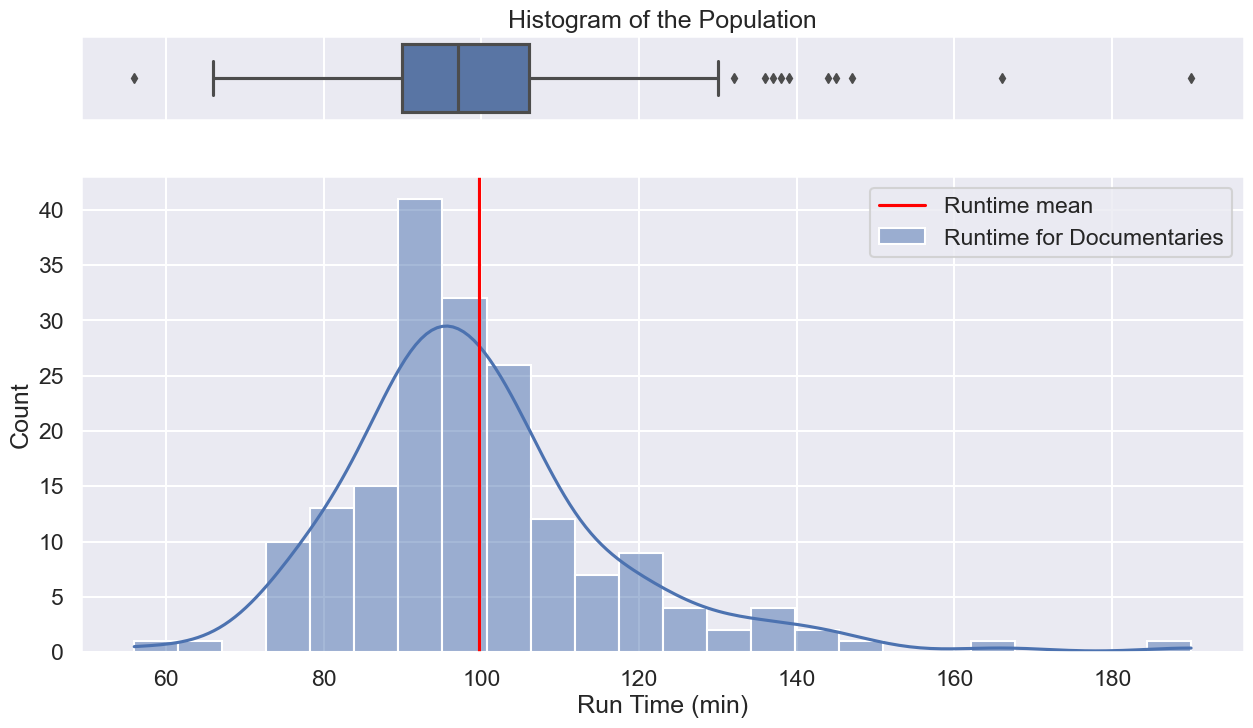

In [57]:
fig,(ax_box, ax_hist) = plt.subplots(2, figsize=(15,8), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(population['runtime_minutes'], ax=ax_box)
sns.histplot(population['runtime_minutes'], kde=True,label='Runtime for Documentaries',ax = ax_hist)

ax_hist.set_xlabel('Run Time (min)')
ax_box.set_xlabel('')

ax_hist.axvline(99.65,c='red',label='Runtime mean')

ax_box.set_title('Histogram of the Population')
ax_hist.legend();

In [58]:
sample = population[population['averagerating'] < 7.34][['runtime_minutes']]
sample.describe()

,runtime_minutes
count,69.000000
mean,95.956522
std,13.242573
min,66.000000
25%,89.000000
50%,95.000000
75%,102.000000
max,130.000000


c:\Users\Culle\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


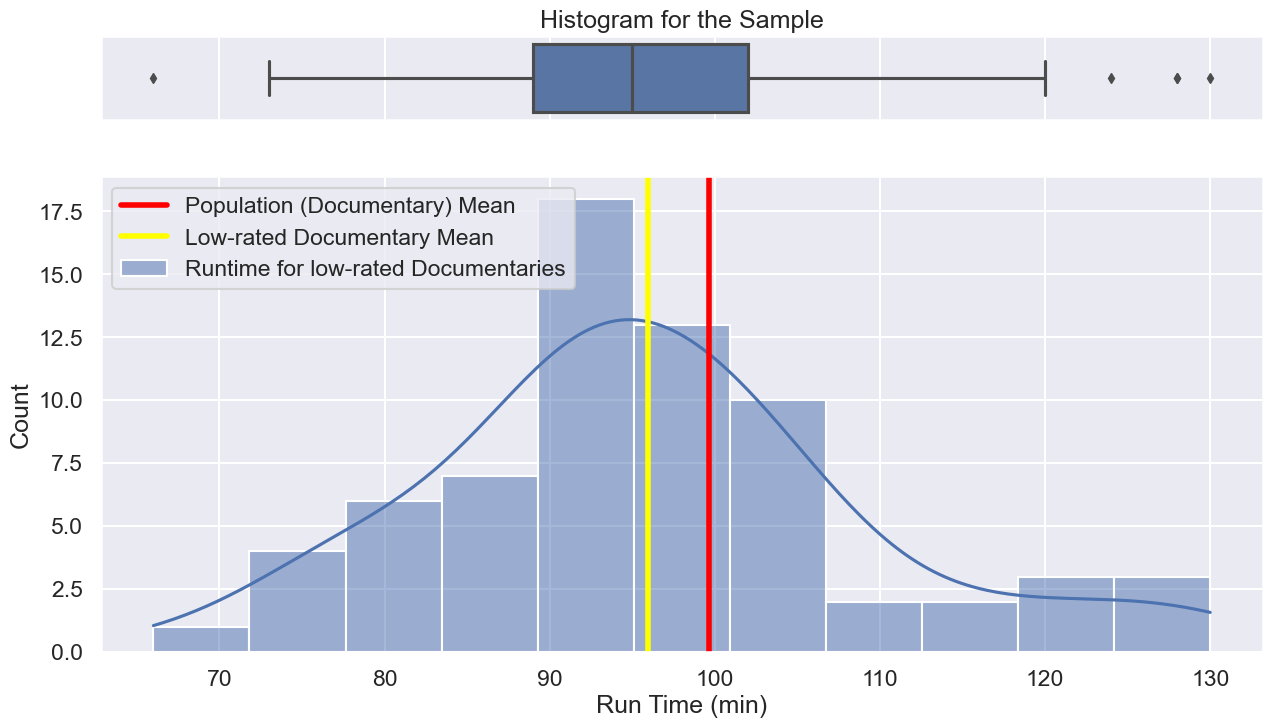

In [59]:
fig,(ax_box, ax_hist) = plt.subplots(2, figsize=(15,8), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(sample['runtime_minutes'], ax=ax_box)
sns.histplot(sample['runtime_minutes'], kde=True,label='Runtime for low-rated Documentaries',ax = ax_hist)

ax_hist.set_xlabel('Run Time (min)')
ax_box.set_xlabel('')

ax_hist.axvline(99.65,c='red',label='Population (Documentary) Mean',lw=4)
ax_hist.axvline(95.95,c='yellow',label='Low-rated Documentary Mean',lw=4)

ax_box.set_title('Histogram for the Sample')
ax_hist.legend(loc='upper left');

### Steps for performing hypothesis testing (one-sided one-sample t-test)


1. **$H_o$** = The runtime mean for all documentaries (99.65) and the runtime mean for low-rated documentaries (95.95) are the same

   **$H_a$** = The runtime mean for low-rated documentaries (95.95) is smaller than the runtime mean for all documentaries(99.65) 
   

2. We choose a statistical significance of $\alpha$ = 0.05


3. Steps $3$, $4$ and $5$ can be avoided using built-in scipy `ttest_1samp()` function


In [60]:
results = stats.ttest_1samp(
    a=sample,   # the entire array-like sample
    popmean=99.65 # the mean you are testing the sample against
)

results

Ttest_1sampResult(statistic=array([-2.31679566]), pvalue=array([0.02353442]))

Now we decide whether or not to reject $H_0$  ($\alpha$ > p_value?)

In [61]:
resolution = results[1][0]/2 < 0.05

if resolution == True:
    print(f'With a p-value of {round(results[1][0],5)}, we are able to reject the Null Hypothesis,\
          meaning that the average runtime of Documentaries is less than that of the population,\
          with an statistical significance of 5%')
else:
    print(f'With a p-value of {results[1][0]}, we are unable to reject the Null Hypothesis')

With a p-value of 0.02353, we are able to reject the Null Hypothesis,          meaning that the average runtime of Documentaries is less than that of the population,          with an statistical significance of 5%


## With the information provided, we are able to reject the Null Hypothesis.

 This means that the average runtime of Documentaries is less than that of the population, with an statistical significance of 5%

# Conclusion

As stated, this Notebook was created with the intention of using our knowledge of Data Science to provice 3 solid business recomendations based on our findings. Will make this notebook available to CV in the hopes that the transparency provided will allow them to understand and agree with our methods and suggestions.